## Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
import plotly.express as px
import plotly.io as pio

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_DF = pd.read_csv(file_name)

In [3]:
hr_DF.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
hr_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
hr_DF.shape

(14999, 9)

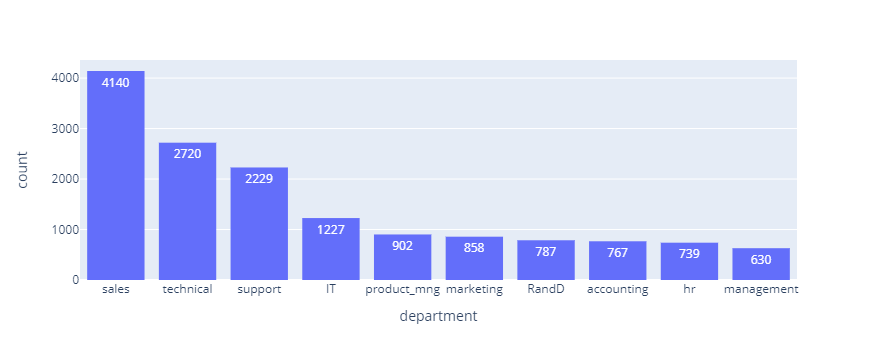

In [6]:
px.histogram(hr_DF,x='department',text_auto=True).update_xaxes(categoryorder="total descending")

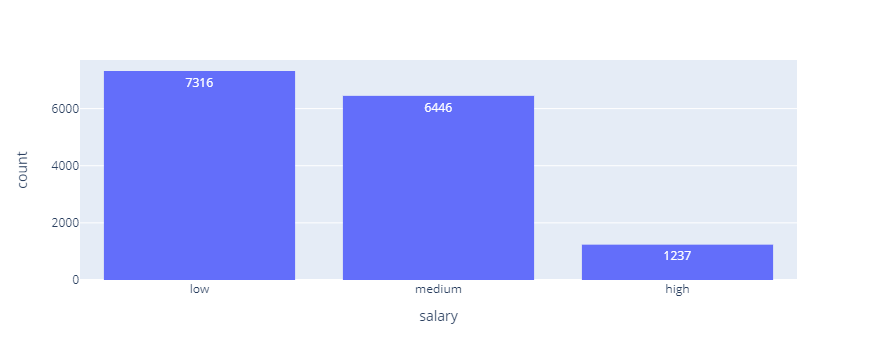

In [7]:
px.histogram(hr_DF,x='salary',text_auto=True).update_xaxes(categoryorder="total descending")

## Load the employee evaluation and satisfaction data

In [6]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [7]:
emp_satis_eval.shape

(14999, 3)

### merge tables

In [8]:
main_df = hr_DF.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))

main_df = main_df.reset_index()

main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### handling missing data

In [9]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [12]:
main_df[main_df.isnull().any(axis=1)].head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN


fill these missing values with their average

In [13]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#main_df.fillna(main_df.mean(),inplace=True)
main_df.select_dtypes(exclude=['object']).fillna(main_df.select_dtypes(exclude=['object']).mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


remove the employee ID column since we will not need it for prediction

In [15]:
main_df.drop('employee_id',axis=1, inplace=True)

### Analysis by department

In [16]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [17]:
main_df.groupby('department').mean()[['number_project','left']].sort_values(by='left').style.background_gradient(cmap='summer')

,number_project,left
department,,
management,3.860317,0.144444
RandD,3.853875,0.153748
product_mng,3.807095,0.219512
IT,3.816626,0.222494
marketing,3.687646,0.236597
sales,3.776329,0.244928
support,3.803948,0.248991
technical,3.877941,0.256250
accounting,3.825293,0.265971


<AxesSubplot:>

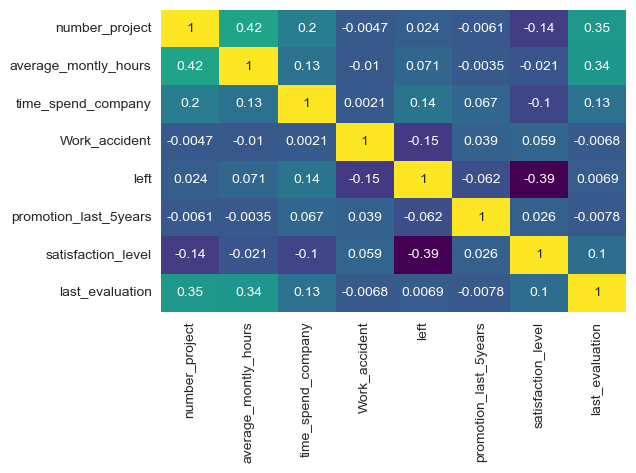

In [21]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(main_df.corr(), cmap='viridis', annot=True, cbar=False)
#px.imshow(main_df.corr(),text_auto=True, aspect='auto', color_continuous_scale='Viridis')

### preparing data for machine learning

In [22]:
main_df = pd.get_dummies(main_df,drop_first=True)

In [23]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


**train test split**

In [24]:
from sklearn.model_selection import train_test_split

X = main_df.drop('left',axis=1).values
y = main_df['left'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
## scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.587060,0.983762,0.340625,-0.413022,-0.148657,-2.063240,0.721656,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,3.854804,-0.62262,-0.41397,-0.467036,1.029092,-0.872176
1,0.159755,-0.940732,-0.343557,2.421176,-0.148657,-0.175855,-0.213024,-0.233765,-0.232629,-0.222206,4.578694,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036,-0.971730,1.146558
2,-1.458448,-0.940732,-0.343557,-0.413022,-0.148657,-0.898683,-1.381375,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162,1.029092,-0.872176
3,0.159755,-1.381761,0.340625,-0.413022,-0.148657,1.189488,-0.213024,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036,-0.971730,1.146558
4,0.968857,1.244370,1.024807,-0.413022,-0.148657,0.828074,1.481084,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162,-0.971730,1.146558


### let's train the logistic regression model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix

Accuracy fo model 78.58%


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500





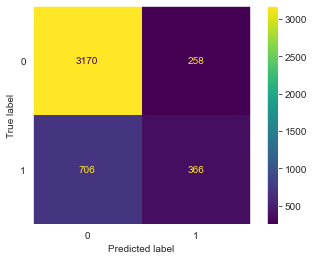

In [29]:
logistic_model = LogisticRegression(solver='lbfgs')

logistic_model.fit(X_train,y_train)

logistic_pred = logistic_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,logistic_pred)*100))

print("\n")

print(classification_report(y_test,logistic_pred))

print("\n")

plot_confusion_matrix(logistic_model,X_test,y_test)
plt.grid(None)


### let's train the model for random forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier

Accuracy fo model 98.51%


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.94      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.98      4500





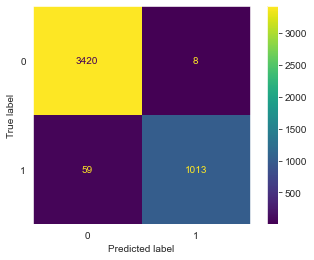

In [31]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

print("Accuracy fo model {0:.2f}%".format(accuracy_score(y_test,rf_pred)*100))

print("\n")

print(classification_report(y_test,rf_pred))

print("\n")

plot_confusion_matrix(rf_model,X_test,y_test)
plt.grid(None)


### build model with deep model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
tf.random.set_seed(42)

In [72]:
model = Sequential()

model.add(Dense(64,kernel_regularizer = tf.keras.regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,kernel_regularizer = tf.keras.regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.3))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

In [73]:
model.compile(optimizer='adam',
               loss = 'binary_crossentropy',
               metrics=['accuracy'])

In [74]:
model.fit( x = X_train,
           y = y_train,
           epochs = 50,
   
              validation_data = (X_test,y_test) )

Epoch 1/50
329/329 [==============================] - 5s 12ms/step - loss: 0.8334 - accuracy: 0.8296 - val_loss: 0.4026 - val_accuracy: 0.9227
Epoch 2/50
329/329 [==============================] - 5s 15ms/step - loss: 0.3406 - accuracy: 0.9194 - val_loss: 0.2881 - val_accuracy: 0.9380
Epoch 3/50
329/329 [==============================] - 8s 23ms/step - loss: 0.2750 - accuracy: 0.9361 - val_loss: 0.2520 - val_accuracy: 0.9498
Epoch 4/50
329/329 [==============================] - 7s 22ms/step - loss: 0.2481 - accuracy: 0.9454 - val_loss: 0.2391 - val_accuracy: 0.9489
Epoch 5/50
329/329 [==============================] - 5s 14ms/step - loss: 0.2374 - accuracy: 0.9477 - val_loss: 0.2310 - val_accuracy: 0.9513
Epoch 6/50
329/329 [==============================] - 6s 17ms/step - loss: 0.2304 - accuracy: 0.9460 - val_loss: 0.2287 - val_accuracy: 0.9542
Epoch 7/50
329/329 [==============================] - 8s 23ms/step - loss: 0.2245 - accuracy: 0.9502 - val_loss: 0.2243 - val_accuracy: 0.9496

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.rename(columns={"loss":"Train loss","val_loss":'Test/val loss'},inplace=True)

<AxesSubplot:>

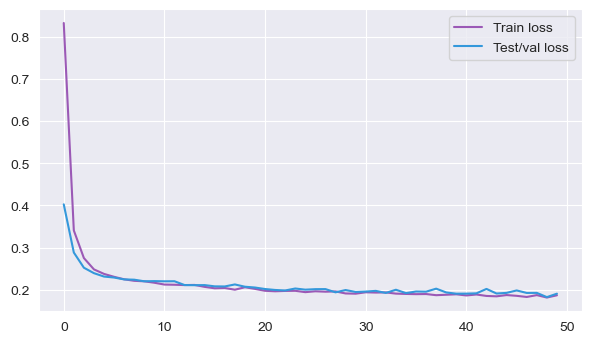

In [76]:
fig,ax = plt.subplots(figsize=(7,4),dpi=100)
loss_df[['Train loss','Test/val loss']].plot(ax=ax)

evaluate the model

In [77]:
model.evaluate(X_test, y_test)

141/141 [==============================] - 1s 6ms/step - loss: 0.1904 - accuracy: 0.9553


[0.19035683572292328, 0.9553333520889282]

In [78]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3428
           1       0.92      0.89      0.90      1072

    accuracy                           0.96      4500
   macro avg       0.94      0.93      0.94      4500
weighted avg       0.95      0.96      0.96      4500





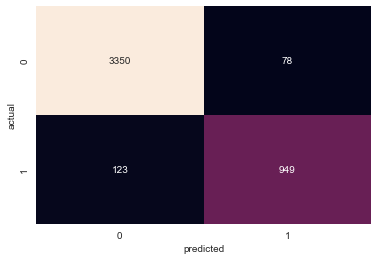

In [79]:
print(classification_report(y_test,y_pred))

print('\n')

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='.4g')
plt.xlabel('predicted')
plt.ylabel('actual');